Utilise les embeddings de designation et de predictions pour générer une prédiction: sur le texte seulement


In [8]:
import os

import importlib

import RktnChallenge.RktnModel
importlib.reload(RktnChallenge.RktnModel)
from RktnChallenge.RktnModel import ModelTrainer

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,Adagrad
import numpy as np
import ast

In [9]:

# PARAMS  de base
PATH = "images/crop224/"
img_size = 224
depth = 3

from RktnChallenge.RktnModel import ModelTrainer

trainer = ModelTrainer("embeddings_final.csv",PATH)

list_tags = trainer.data.prdtypecode.unique().tolist()
num_categories = len(list_tags)

X_data = trainer.data[["embeddings_desi","embeddings_desc","embedding_vit"]]

def convert_string_to_nparray(s):    
    # Supprime les caractères non désirés et divise la chaîne en une liste de nombres
    numbers = [float(x) for x in s.replace("[", "").replace("]", "").split()]
    return np.array(numbers)
def translate_string_to_array(s):
    liste_python = ast.literal_eval(s)
    return np.array(liste_python)

X_data.loc[:, 'embeddings_desc'] = X_data['embeddings_desc'].apply(convert_string_to_nparray)
X_data.loc[:, 'embeddings_desi'] = X_data['embeddings_desi'].apply(convert_string_to_nparray)


y = trainer.encodeLabel("prdtypecode")
label_size = trainer.getLabelSize()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0.8        84916 non-null  int64 
 1   Unnamed: 0.7        84916 non-null  int64 
 2   Unnamed: 0.6        84916 non-null  int64 
 3   Unnamed: 0.5        84916 non-null  int64 
 4   Unnamed: 0.4        84916 non-null  int64 
 5   Unnamed: 0.3        84916 non-null  int64 
 6   Unnamed: 0.2        84916 non-null  int64 
 7   Unnamed: 0.1        84916 non-null  int64 
 8   Unnamed: 0          84916 non-null  int64 
 9   designation         84916 non-null  object
 10  description         55029 non-null  object
 11  productid           84916 non-null  int64 
 12  imageid             84916 non-null  int64 
 13  prdtypecode         84916 non-null  int64 
 14  imgname             84916 non-null  object
 15  desi_langue         84916 non-null  object
 16  tr_designation      84

,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,designation,...,designation_tkn,description_tkn,merged,merged_desi_desc,description_length,designation_length,embeddings_desi,embeddings_desc,embedding_vit,toto
0,0,0,0,0,0,0,0,0,0,Olivia: Personalisiertes Notizbuch / 15 Seite...,...,"['olivia', 'personalisiertes', 'notizbuch', '1...",[],"['olivia', 'personalisiertes', 'notizbuch', '1...",olivia personalisiertes notizbuch seiten punk...,0,88,[[ 0.29298612 0.51876533 -0.14297847 0.12007...,[[-1.34651899e-01 -1.72662511e-01 2.39173591e...,"[-0.62579757, -0.3949617, -0.13472985, -0.3532...","[-0.62579757, -0.3949617, -0.13472985, -0.3532..."
1,1,1,1,1,1,1,1,1,1,Journal Des Arts (Le) Ndeg 133 Du 28/ 9/2 1 -...,...,"['journal', 'arts', 'ndeg', '133', '28', '9', ...",[],"['journal', 'arts', 'ndeg', '133', '28', '9', ...",journal arts ndeg art marche salon art as...,0,208,[[-4.14443202e-02 5.49416065e-01 -2.03480035e...,[[-1.34651899e-01 -1.72662511e-01 2.39173591e...,"[-0.18619248, 0.20758356, 0.025201198, 0.37738...","[-0.18619248, 0.20758356, 0.025201198, 0.37738..."
2,2,2,2,2,2,2,2,2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,...,"['grand', 'stylet', 'ergonomique', 'bleu', 'ga...","['pilot', 'style', 'touch', 'pen', 'marque', '...","['grand', 'stylet', 'ergonomique', 'bleu', 'ga...",grand stylet ergonomique bleu gamepad nintendo...,676,76,[[-1.63001209e-01 4.54254262e-02 -1.50607407e...,[[ 1.15548760e-01 -3.23006511e-01 -8.96141380e...,"[0.07957726, -0.13591173, 0.56076324, -0.54911...","[0.07957726, -0.13591173, 0.56076324, -0.54911..."
3,3,3,3,3,3,3,3,3,3,Peluche Donald - Europe - Disneyland 2 (Mar...,...,"['peluche', 'donald', 'europe', 'disneyland', ...",[],"['peluche', 'donald', 'europe', 'disneyland', ...",peluche donald europe disneyland marionnette ...,0,63,[[-7.29806572e-02 -1.29631907e-01 2.50607520e...,[[-1.34651899e-01 -1.72662511e-01 2.39173591e...,"[0.118045375, -0.6349218, -0.2599513, 0.060745...","[0.118045375, -0.6349218, -0.2599513, 0.060745..."
4,4,4,4,4,4,4,4,4,4,La Guerre Des Tuques,...,"['guerre', 'tuques']","['luc', 'idees', 'grandeur', 'vouloir', 'organ...","['guerre', 'tuques', 'luc', 'idees', 'grandeur...",guerre tuques luc idees grandeur vouloir organ...,187,20,[[ 9.87143740e-02 1.36841923e-01 1.51988551e...,[[-4.39696088e-02 2.09189951e-01 -9.74424258e...,"[-0.5080364, 0.12471292, -0.28568912, -0.35117...","[-0.5080364, 0.12471292, -0.28568912, -0.35117..."


In [27]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, random_state = 42)
X1_train = X_train["embeddings_desi"].values
X1_train = np.stack(X1_train).astype(np.float32)
X2_train = X_train["embeddings_desc"].values
X2_train = np.stack(X2_train).astype(np.float32)

X1_val = X_val["embeddings_desi"].values
X1_val = np.stack(X1_val).astype(np.float32)
X2_val = X_val["embeddings_desc"].values
X2_val = np.stack(X2_val).astype(np.float32)



X1_test = X_test["embeddings_desi"].values
X1_test = np.stack(X1_test).astype(np.float32)
X2_test = X_test["embeddings_desc"].values
X2_test = np.stack(X2_test).astype(np.float32)

del X_data
del X_test
del X_train

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model

input_1 = Input(shape=(768,), name="input_1")
input_2 = Input(shape=(768,), name="input_2")

# Concaténer les deux entrées
merged = Concatenate(axis=1)([input_1, input_2])

x = Dense(512, activation='relu')(merged)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(27, activation='softmax')(x)

model = Model(inputs=[input_1, input_2], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


2023-09-12 22:54:43.419953: I external/local_xla/xla/stream_executor/cuda/cuda_gpu_executor.cc:885] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 22:54:43.438974: I external/local_xla/xla/stream_executor/cuda/cuda_gpu_executor.cc:885] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 22:54:43.439300: I external/local_xla/xla/stream_executor/cuda/cuda_gpu_executor.cc:885] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 22:54:43.440449: I external/local_xla/xla/stream_executor/cuda/cuda_gpu_executor.cc:885] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 22:54:43.440654: I external/local_xla/xla

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 768)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 768)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 1536)                 0         ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 dense (Dense)               (None, 512)                  786944    ['concatenate[0][0]']     

 node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 22:54:43.924267: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1912] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10598 MB memory:  -> device: 0, name: NVIDIA TITAN X (Pascal), pci bus id: 0000:02:00.0, compute capability: 6.1


In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, Lambda,Multiply
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import AdamW

input_1 = Input(shape=(768,), name="input_1")
input_2 = Input(shape=(768,), name="input_2")

# Concaténer les deux entrées

# Le merge des deux towers
# Poids pour la moyenne pondérée
w_i1 = tf.Variable(initial_value=tf.ones([768])*0.5, trainable=True, dtype=tf.float32) # initialisé à 0.5, mais entraînable
w_i2 = tf.Variable(initial_value=tf.ones([768])*0.5, trainable=True, dtype=tf.float32) # initialisé à 0.5, mais entraînable

w_i3 = tf.Variable(initial_value=tf.ones([768])*0.5, trainable=True, dtype=tf.float32) # initialisé à 0.5, mais entraînable

#produit = Multiply()([input_1, input_2])
difference = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([input_1, input_2])

# Fusion moyenne pondérée
#moyenne_features = Lambda(lambda features: w_i1 * features[0] + w_i2 * features[1] + w_i3)([input_1, input_2])

#merged = Concatenate(axis=1)([input_1, input_2])

x = Dense(512, activation='relu')(difference)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(27, activation='softmax')(x)

model = Model(inputs=[input_1, input_2], outputs=output)
optimizer = AdamW(weight_decay=0.01, learning_rate=2e-5) 
#optimizer = Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 768)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 768)]                0         []                            
                                                                                                  
 lambda_9 (Lambda)           (None, 768)                  0         ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 dense_33 (Dense)            (None, 512)                  393728    ['lambda_9[0][0]']     

In [55]:
model.fit([X1_train, X2_train], y_train, epochs=2, batch_size=100, validation_data=([X1_val, X2_val], y_val))

Epoch 1/2
 38/612 [>.............................] - ETA: 2s - loss: 0.1569 - accuracy: 0.9608

2023-09-12 23:47:06.086704: I tensorflow/core/data/root_dataset.cc:62] `tf.data.Options` values set are distribute_options {
  auto_shard_policy: DATA
}
optimization_options {
  apply_default_optimizations: false
}
threading_options {
}
external_state_policy: POLICY_IGNORE
autotune_options {
}
warm_start: false



612/612 [==============================] - 3s 5ms/step - loss: 0.1500 - accuracy: 0.9603 - val_loss: 0.1502 - val_accuracy: 0.9603
Epoch 2/2
  1/612 [..............................] - ETA: 3s - loss: 0.0742 - accuracy: 0.9900

2023-09-12 23:47:08.762385: I tensorflow/core/data/root_dataset.cc:62] `tf.data.Options` values set are distribute_options {
  auto_shard_policy: DATA
}
optimization_options {
  apply_default_optimizations: false
}
threading_options {
}
autotune_options {
}
warm_start: false



612/612 [==============================] - 3s 4ms/step - loss: 0.1497 - accuracy: 0.9608 - val_loss: 0.1503 - val_accuracy: 0.9597


 94/531 [====>.........................] - ETA: 0s

2023-09-12 23:47:14.618697: I tensorflow/core/data/root_dataset.cc:62] `tf.data.Options` values set are distribute_options {
  auto_shard_policy: DATA
}
optimization_options {
  apply_default_optimizations: false
}
threading_options {
}
autotune_options {
}
warm_start: false



531/531 [==============================] - 1s 1ms/step
weighted F1 score: 0.8618771546631717


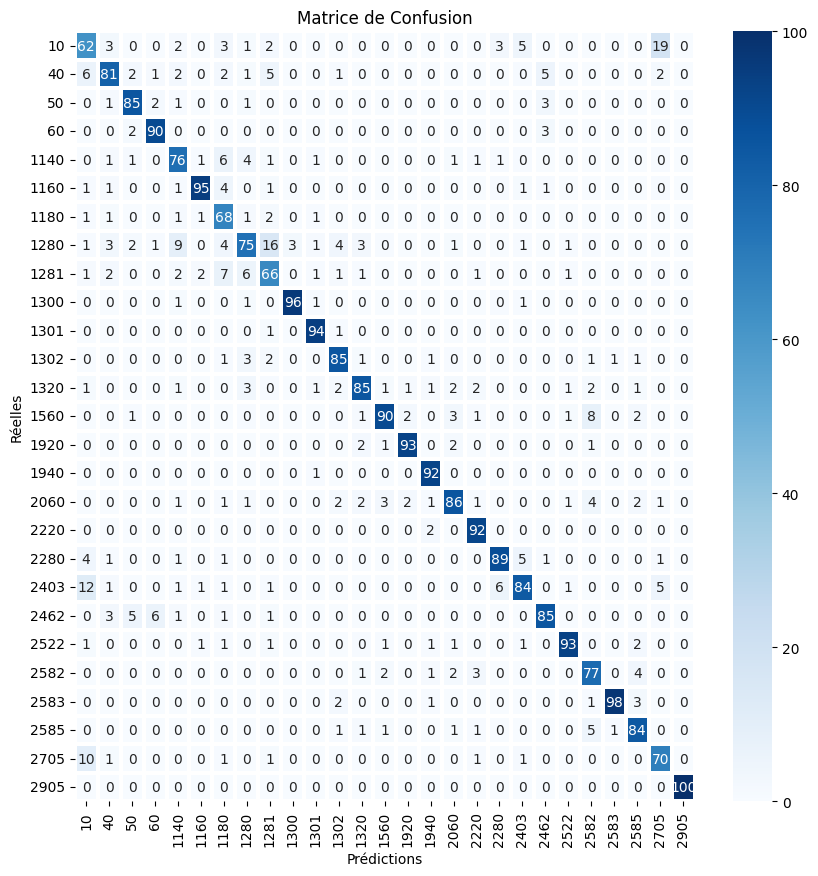

In [56]:
y_pred = model.predict([X1_test, X2_test])
y_pred_ids = np.argmax(y_pred, axis=-1)

trainer.evaluateTestResults(y_test,y_pred_ids)